In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("27-mall_customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import math
def plot_all_histograms(df, title_prefix = ""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize = (5 * n_cols, 4 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

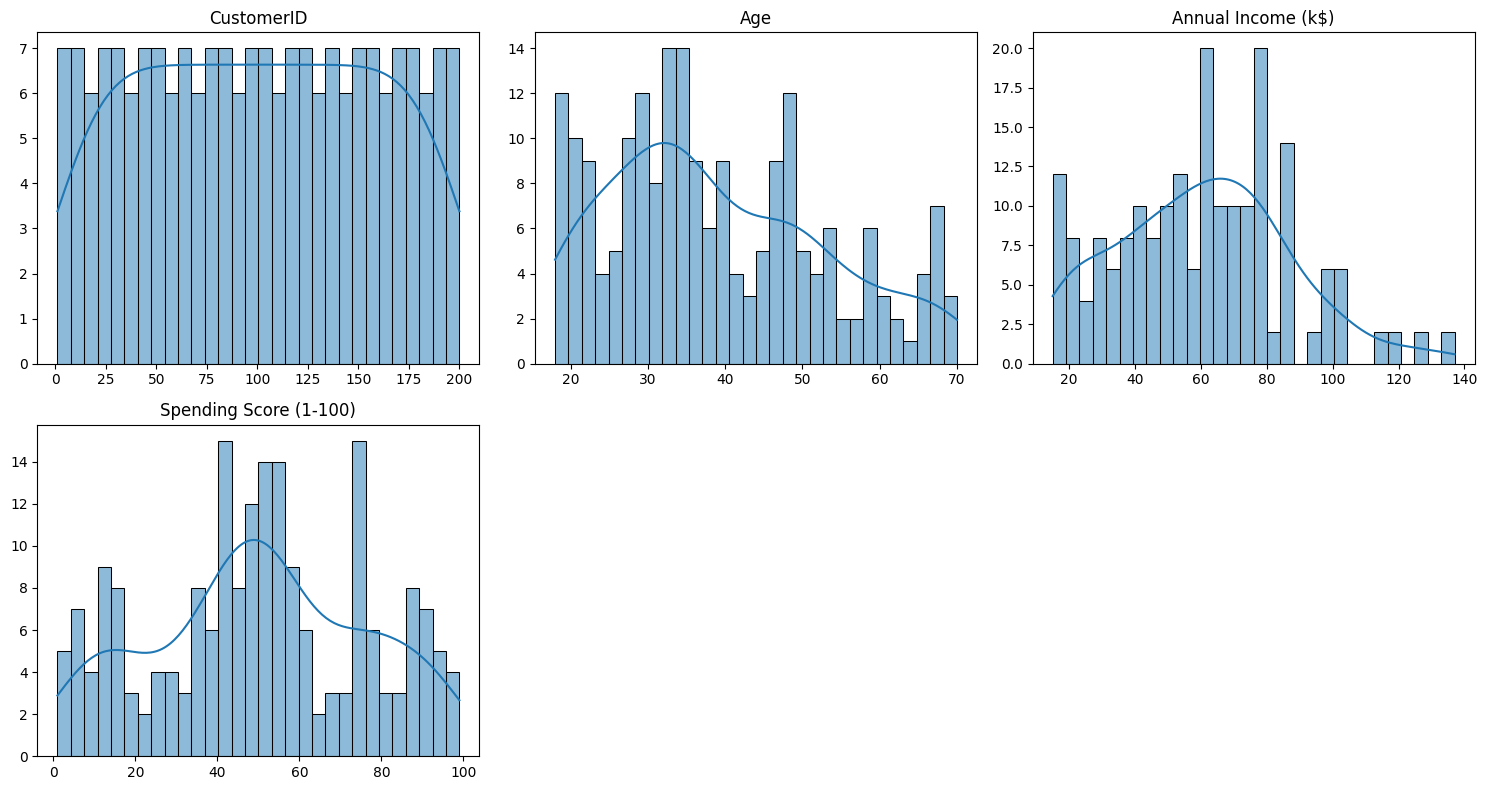

In [10]:
plot_all_histograms(df)

In [11]:
df["Gender"].value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
df = df.drop("CustomerID", axis=1)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaled_dF = scaler.fit_transform(df)

In [21]:
df = pd.DataFrame(scaled_dF, columns=df.columns)

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


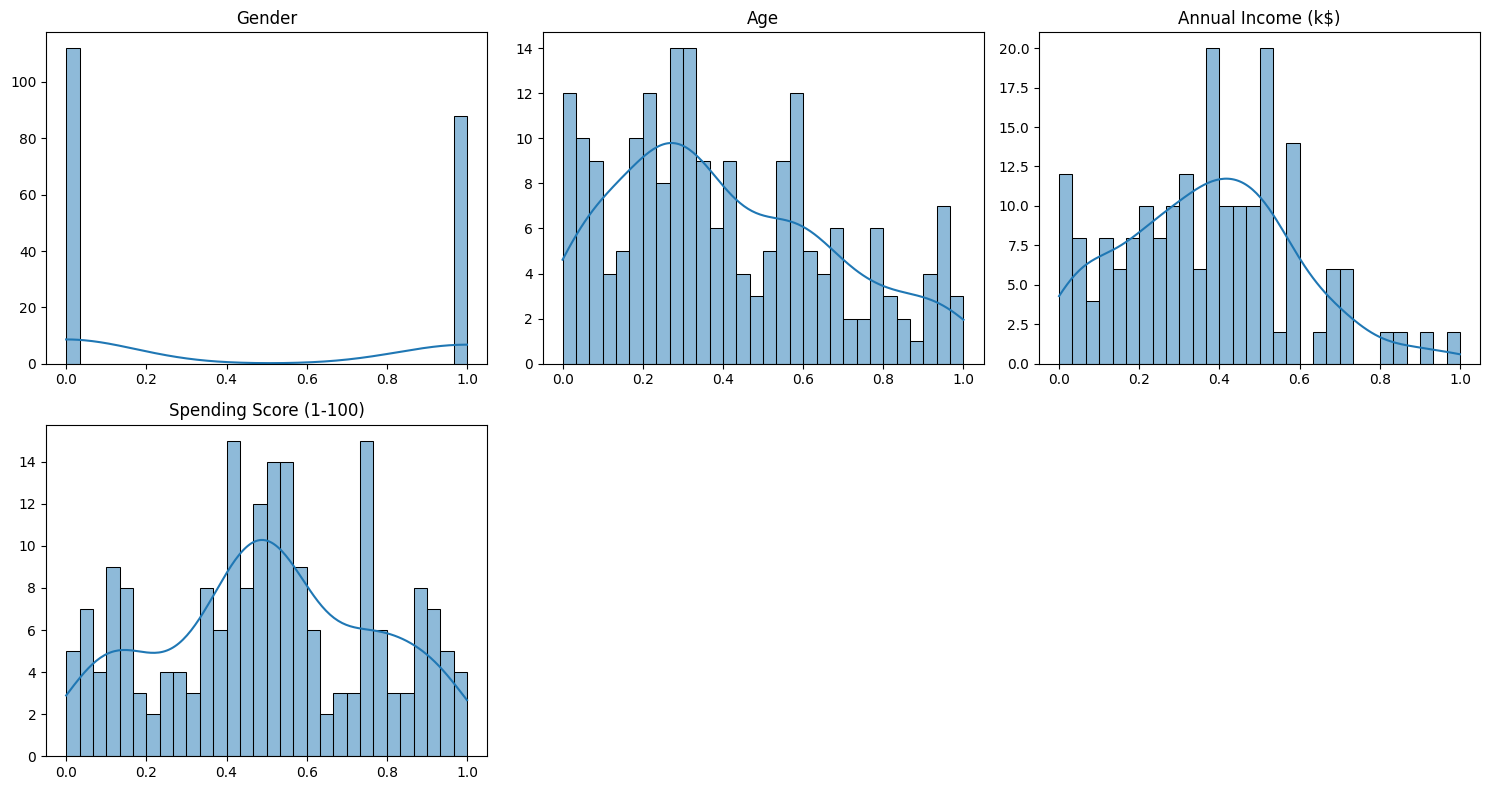

In [23]:
plot_all_histograms(df)

In [24]:
import scipy.cluster.hierarchy as sch

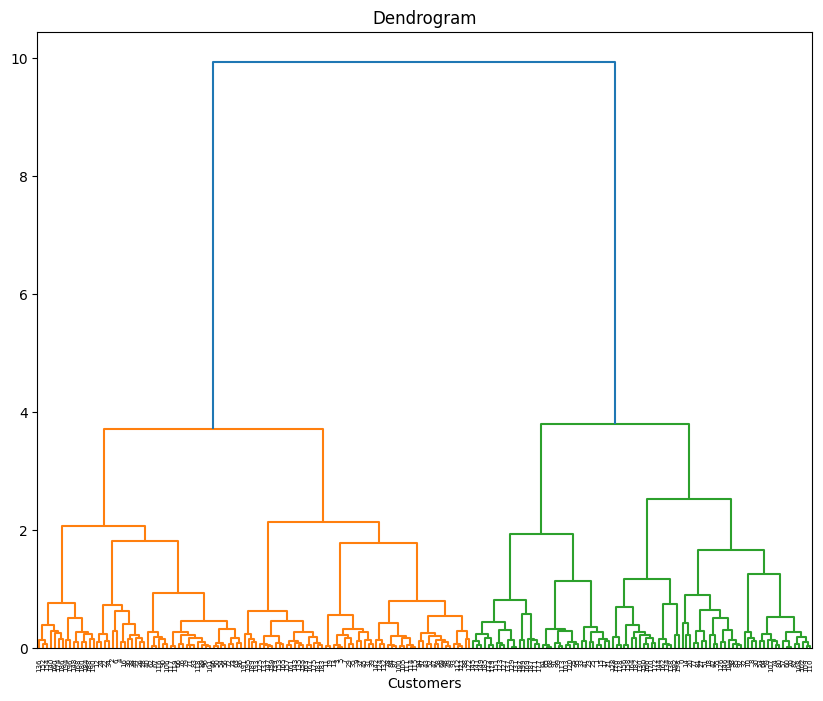

In [27]:
plt.figure(1, figsize=(10, 8))
sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=4)

In [32]:
y_hc = hc.fit_predict(df)

In [33]:
df["cluster"] = pd.DataFrame(y_hc)

In [34]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


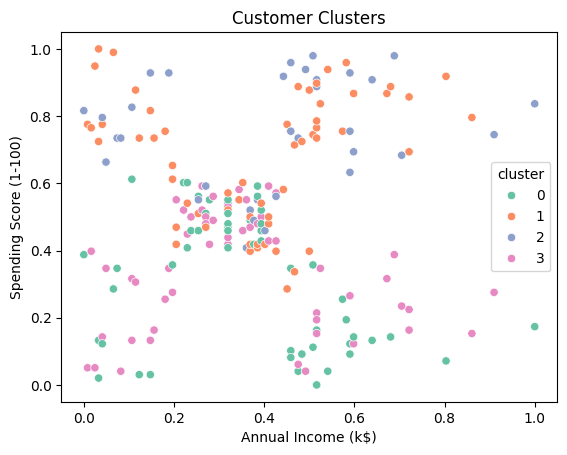

In [37]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["cluster"], palette="Set2")
plt.title("Customer Clusters")
plt.show()

In [38]:
from  sklearn.metrics import silhouette_score  
print(silhouette_score(df,y_hc))

0.7143503785893516


In [39]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

In [40]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [48]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X["cluster"] = y_hc

In [49]:
X

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,0
196,0.909836,0.275510,1
197,0.909836,0.744898,0
198,1.000000,0.173469,1


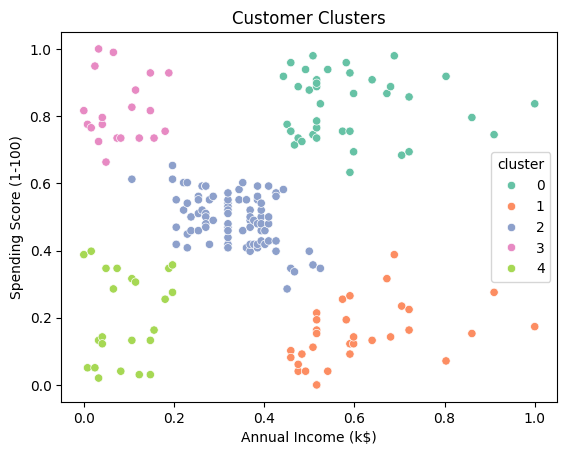

In [50]:
sns.scatterplot(x=X["Annual Income (k$)"], y=X["Spending Score (1-100)"], hue=X["cluster"], palette="Set2")
plt.title("Customer Clusters")
plt.show()


In [51]:
print(silhouette_score(X,y_hc))

0.8524094908097414


In [52]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [54]:
df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis=1)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

features_2d = ["Annual Income (k$)", "Spending Score (1-100)"]
features_3d = ["Annual Income (k$)", "Spending Score (1-100)", "Age"]
features_4d = ["Annual Income (k$)", "Spending Score (1-100)", "Age", "Gender"]

for feats in [features_2d, features_3d, features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    print(f"\n features: {feats}")
    print(f"Silhouette Score: {sil}")
    print(f"Davies-Bouldin Score: {db}")    
    print(f"Calinski-Harabasz Score: {ch}")
    print("-" * 30)




 features: ['Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score: 0.5582698727324803
Davies-Bouldin Score: 0.5734519252471812
Calinski-Harabasz Score: 258.97400737720704
------------------------------

 features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
Silhouette Score: 0.39554543347265464
Davies-Bouldin Score: 0.8746143334035462
Calinski-Harabasz Score: 123.99070840826576
------------------------------

 features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']
Silhouette Score: 0.350324475071563
Davies-Bouldin Score: 1.094195179523857
Calinski-Harabasz Score: 163.46602356383622
------------------------------


In [55]:
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis=1)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

features_2d = ["Annual Income (k$)", "Spending Score (1-100)"]
features_3d = ["Annual Income (k$)", "Spending Score (1-100)", "Age"]
features_4d = ["Annual Income (k$)", "Spending Score (1-100)", "Age", "Gender"]

for feats in [features_2d, features_3d, features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    kmeans = KMeans(n_clusters=5)
    y_kmeans = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, y_kmeans)
    db = davies_bouldin_score(X_scaled, y_kmeans)
    ch = calinski_harabasz_score(X_scaled, y_kmeans)
    print(f"\n features: {feats}")
    print(f"Silhouette Score: {sil}")
    print(f"Davies-Bouldin Score: {db}")    
    print(f"Calinski-Harabasz Score: {ch}")
    print("-" * 30)




 features: ['Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score: 0.5602436353869122
Davies-Bouldin Score: 0.5630236200163117
Calinski-Harabasz Score: 264.70156956422267
------------------------------

 features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
Silhouette Score: 0.4058812015258782
Davies-Bouldin Score: 0.9361270042587139
Calinski-Harabasz Score: 126.05974459737256
------------------------------

 features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']
Silhouette Score: 0.34631022941141765
Davies-Bouldin Score: 1.1496674302698944
Calinski-Harabasz Score: 161.03381447152339
------------------------------


c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
